# Embedding Techniques

In this notebook we will go into the different embedding techniques with Qiskit. These are:

* Basis Embedding
* Amplitude Embedding
* Angle Embedding

In [1]:
import numpy as np
from qiskit import *

# Initialize the simulator
aer_sim = Aer.get_backend('statevector_simulator')

## Basis Embedding

In this example we will encode the numbers:
1 ('01') and 3 ('11') in the computational basis state of a 2 qubits system

We will use the following gates:

#### Hadamard gate

\begin{equation*}
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
\end{equation*}

#### X: bit-flip gate

\begin{equation*}
X=
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
\end{equation*}



In [2]:
# Initialize and create the quantum circuit
idx = QuantumRegister(2, 'idx')
qc = QuantumCircuit(idx)

# Create the string of bits
x1 = '01'
x2 = '11'

# Add the Hadamard gate on the second qubit
qc.h(1)

# Separate the gates with a barrier
qc.barrier()

# Add the X gate on the first qubit
qc.x(0)

# Plot the circuit
qc.draw()

░ ┌───┐
idx_0: ──────░─┤ X ├
       ┌───┐ ░ └───┘
idx_1: ┤ H ├─░──────
       └───┘ ░

#### Simulation Results


Expected:  [0, 0.707, 0, 0.707 ]
Obtained:  [0.   +0.j 0.707+0.j 0.   +0.j 0.707+0.j]


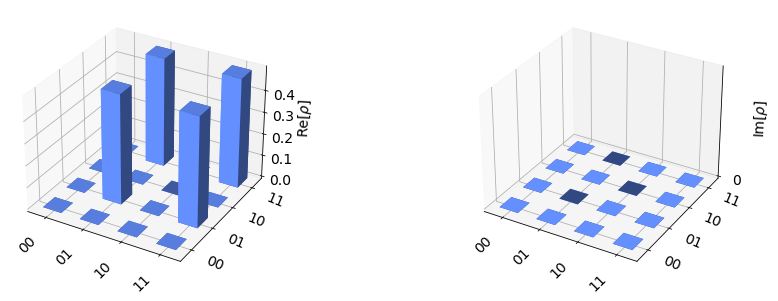

In [3]:
result = execute(qc, aer_sim).result()
outputstate = result.get_statevector(qc,  decimals=3)

# Compare the results with the original vector
print("Expected: ", "[0, " + str(np.round(1/np.sqrt(2), 3)) + ", 0, " + str(np.round(1/np.sqrt(2), 3)) + " ]")
print("Obtained: ", outputstate)

qiskit.visualization.plot_state_city(outputstate)

## Amplitude Embedding

In this example we will encode the vector: (1.0, 0, 5.5, 0)
as function of the amplitudes of a 2 qubits system


We will use the following gates:

#### Rotation around Y-axis

\begin{equation*}
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix}
\end{equation*}

In order to find the correct rotational angle we use the following formula,

\begin{equation*}
\theta = 2 arcsin
    \left(
        \frac{
            \sqrt{\sum_{l = 1}^{2^{s-1}}
                | \alpha_{(2j-1)2^{s-1}+l}|^{2}}
                }
            {\sqrt{\sum_{l = 1}^{2^s}
                | \alpha_{(j-1)2^s+l}|^{2}}
            }
    \right)
\end{equation*}

In [4]:
# Initialize and create the quantum circuit
idx = QuantumRegister(2, 'idx')
qc = QuantumCircuit(idx)

# Create a vector
x = (1.0, 0.0, 5.5, 0.0)

# Normalize it
x_norm = x/np.linalg.norm(x)

# Find the rotational angle
a0 = x_norm[0]
a2 = x_norm[2]

angle = 2*np.arcsin( np.sqrt(a2**2) / np.sqrt(a0**2 + a2**2) )

# Add the Rotational Y gate to the second qubit
qc.ry(angle, 1)

# Plot the circuit
qc.barrier()
qc.draw()

░ 
idx_0: ───────────────░─
       ┌────────────┐ ░ 
idx_1: ┤ Ry(2.7819) ├─░─
       └────────────┘ ░

#### Simulation Results

Expected:  [0.179, 0, 0.984, 0]
Obtained:  [0.179+0.j 0.   +0.j 0.984+0.j 0.   +0.j]


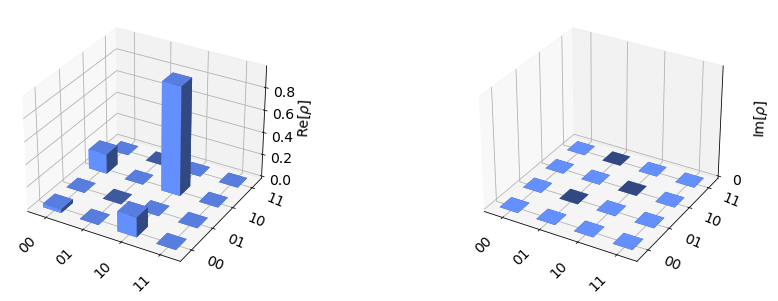

In [5]:
result = execute(qc, aer_sim).result()
outputstate = result.get_statevector(qc, decimals=3)

# Compare the results with the original vector
print("Expected: ", "[" + str(np.round(a0, 3)) + ", 0, " + str(np.round(a2, 3)) + ", 0]")
print("Obtained: ", outputstate)

qiskit.visualization.plot_state_city(outputstate)

# Angle Embedding

In this example we will encode the vector: (1.0, 0, 5.5, 0)
in the amplitudes of a 4 qubits system.


We will use the following gate:

#### Rotation around Y-axis

\begin{equation*}
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix}
\end{equation*}

In [6]:
# Initialize and create the quantum circuit
idx = QuantumRegister(4, 'idx')
qc = QuantumCircuit(idx)

# Create a vector
x = (1.0, 0.0, 5.5, 0.0)

# Normalize it inside [0, 2pi]
x_scaled = 2*np.pi*(x - np.min(x))/np.ptp(x)

# Add the R_y gates
qc.ry(2*x_scaled[0], 3)
qc.ry(2*x_scaled[1], 2)
qc.ry(2*x_scaled[2], 1)
qc.ry(2*x_scaled[3], 0)

# Plot the circuit
qc.barrier()
qc.draw()

┌───────┐   ░ 
idx_0: ──┤ Ry(0) ├───░─
         ├───────┴┐  ░ 
idx_1: ──┤ Ry(4π) ├──░─
         ├───────┬┘  ░ 
idx_2: ──┤ Ry(0) ├───░─
       ┌─┴───────┴─┐ ░ 
idx_3: ┤ Ry(8π/11) ├─░─
       └───────────┘ ░

#### Simulation Results

Expected:  0.415 0.91
Obtained:  [0.415+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j 0.91 +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j 0.   +0.j]


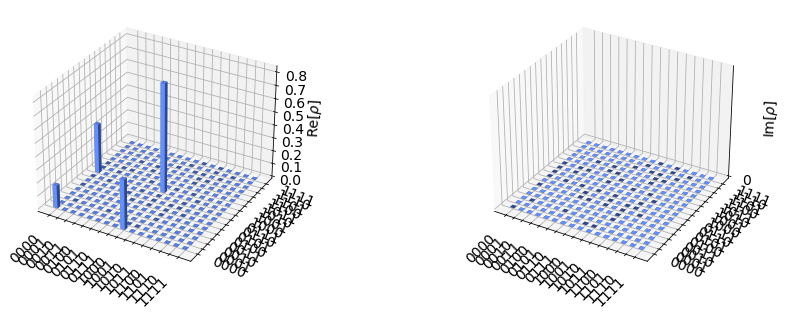

In [7]:
result = execute(qc, aer_sim).result()
outputstate = result.get_statevector(qc, decimals=3)

# Compare the results with the original vector
print("Expected: ", np.round(np.cos(x_scaled[0]), 3),
      np.round(np.sin(x_scaled[0]), 3))
print("Obtained: ", outputstate)

qiskit.visualization.plot_state_city(outputstate)

